# ST-GCN

In [1]:
from src.model.st_gcn import *

df = pd.read_csv('data/data_for_model.csv')
df.head(5)

,LEFT_ELBOW_x,LEFT_HIP_x,LEFT_SHOULDER_x,LEFT_WRIST_x,RIGHT_ELBOW_x,RIGHT_HIP_x,RIGHT_SHOULDER_x,RIGHT_WRIST_x,LEFT_ELBOW_y,LEFT_HIP_y,...,RIGHT_WRIST_y,LEFT_ELBOW_z,LEFT_HIP_z,LEFT_SHOULDER_z,LEFT_WRIST_z,RIGHT_ELBOW_z,RIGHT_HIP_z,RIGHT_SHOULDER_z,RIGHT_WRIST_z,exercise
0,0.494306,0.435416,0.461974,0.492193,0.320912,0.381529,0.367181,0.322582,0.507141,0.630740,...,0.502203,-0.089719,0.000337,0.039939,-0.346921,-0.075649,-0.000382,0.042103,-0.336874,-1
1,0.492015,0.435435,0.462259,0.491906,0.320943,0.381469,0.366824,0.320433,0.521023,0.630559,...,0.503574,-0.093571,0.000344,0.051836,-0.364749,-0.065798,-0.000387,0.052328,-0.318225,-1
2,0.492051,0.435449,0.462260,0.491421,0.320974,0.381461,0.366673,0.319015,0.517668,0.630147,...,0.498068,-0.108150,0.000348,0.058875,-0.375957,-0.076405,-0.000389,0.058376,-0.319684,-1
3,0.491493,0.435497,0.462321,0.492260,0.320294,0.381467,0.366689,0.318692,0.525453,0.629820,...,0.488508,-0.073606,0.001731,0.072559,-0.326744,-0.084063,-0.001726,0.055875,-0.333625,-1
4,0.491555,0.435549,0.462301,0.493636,0.318972,0.381528,0.366703,0.318285,0.523011,0.629353,...,0.481967,-0.078110,0.002196,0.068983,-0.335180,-0.097579,-0.002175,0.054835,-0.344045,-1


## Example sequence

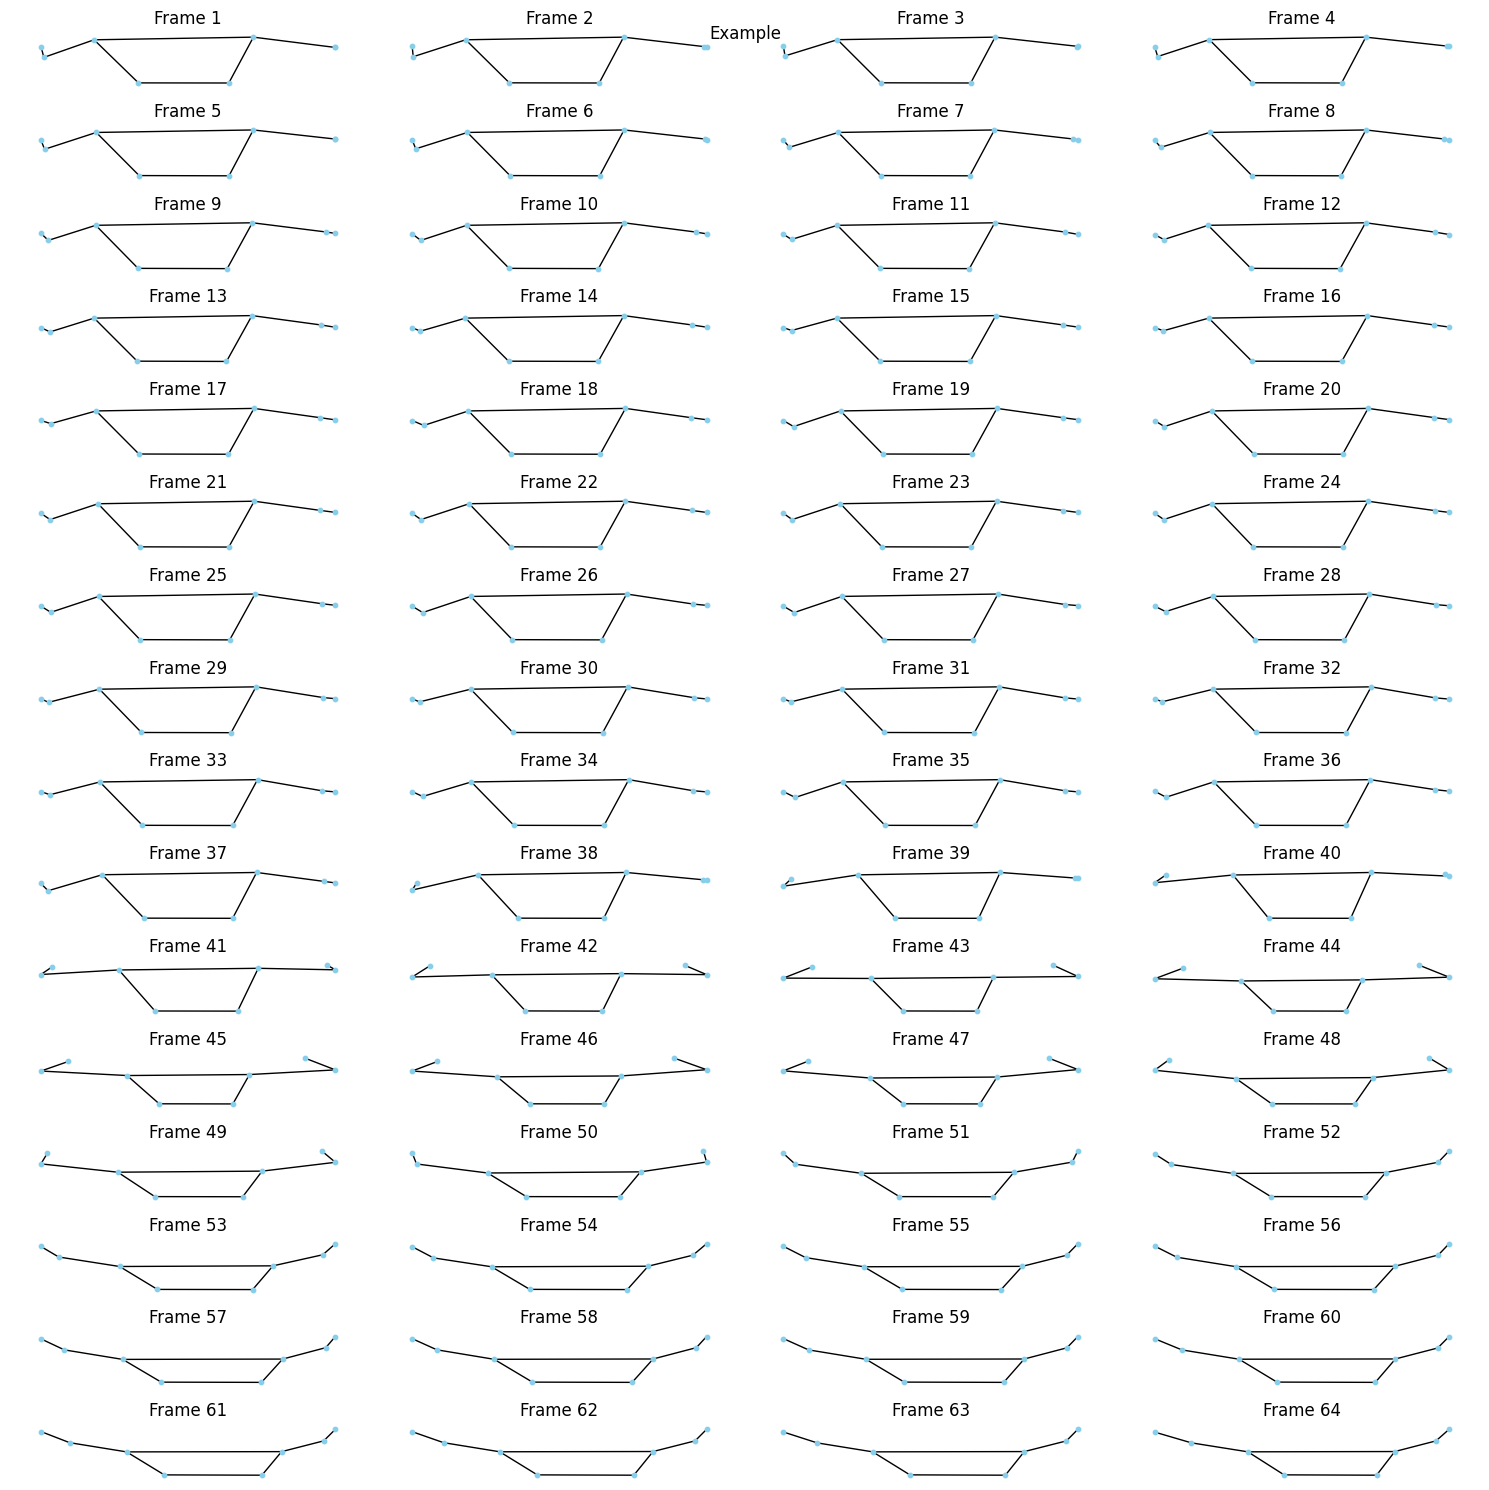

In [2]:
from src.data_viz_3d import plot_sequence, prepare_sequence
%matplotlib inline

sequences = prepare_sequence(df)
idx = 5
example = torch.from_numpy(sequences[idx:idx+64]).float()
plot_sequence(example, f"Example")

## Data Augmentation

In [3]:
import numpy as np

np.random.seed(42)
pose_augmenter = PoseAugmenter(rotation_range = 2, noise_scale_factor = 0.01)

### Horizontal flip

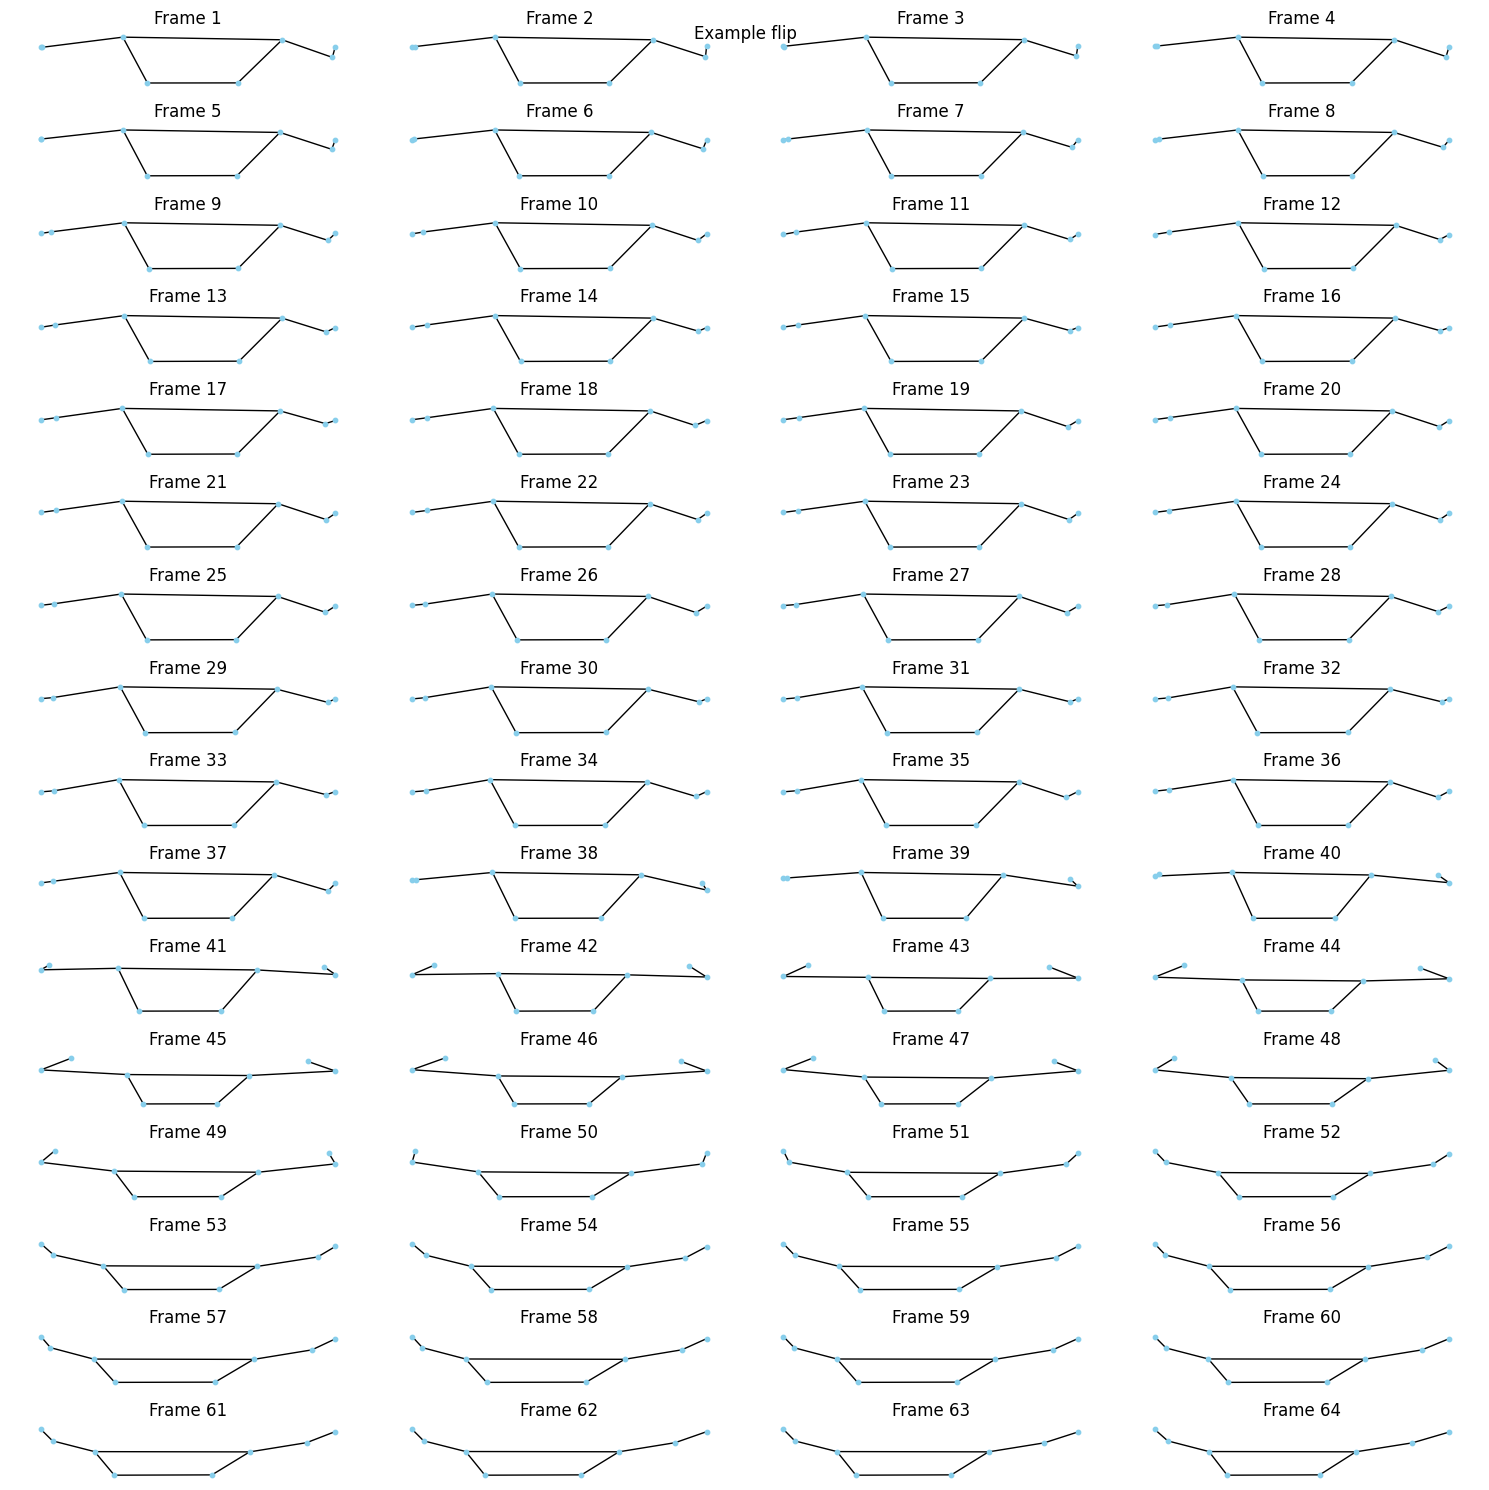

In [4]:
flip_seq = pose_augmenter.horizontal_flip(example)
plot_sequence(flip_seq, f"Example flip")

### Rotate

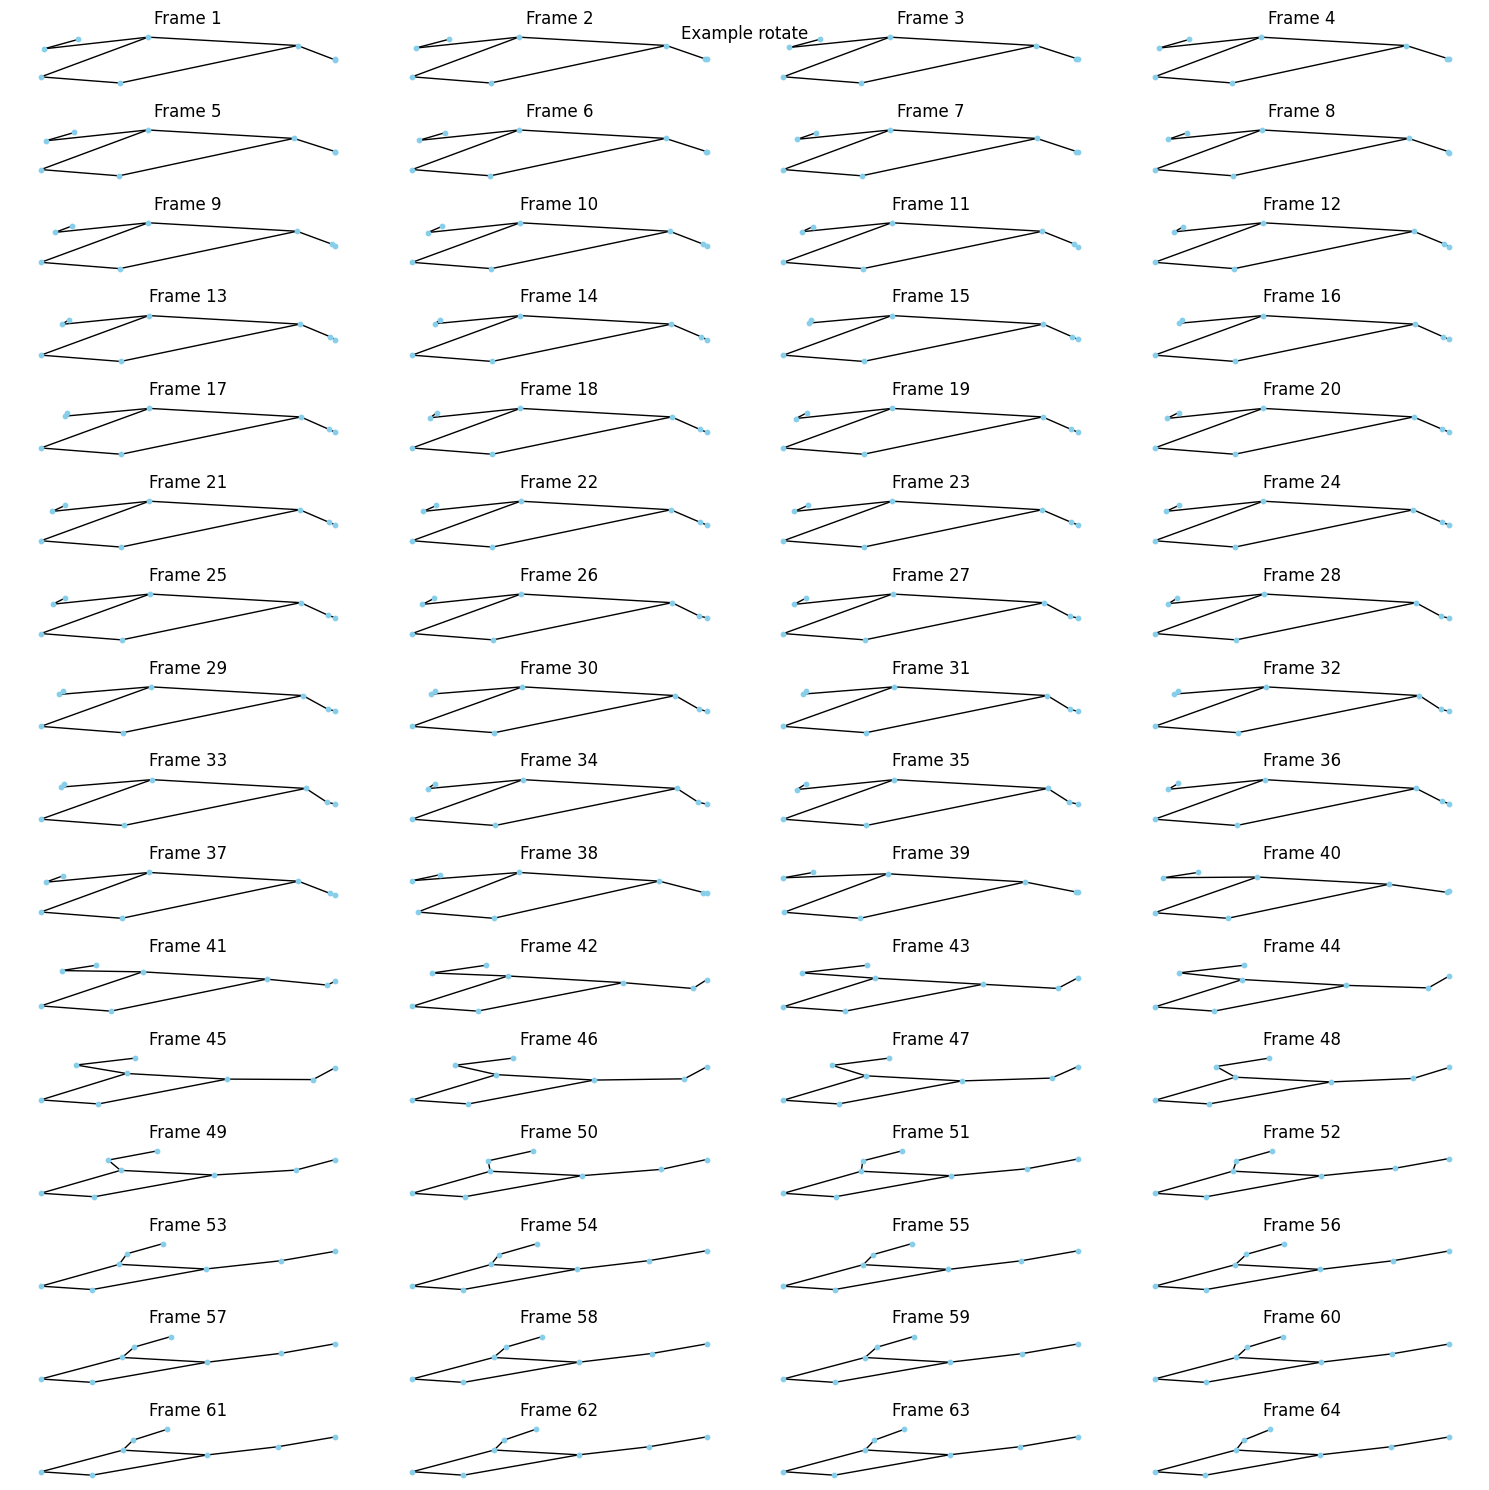

In [5]:
import torch

rotate_seq = pose_augmenter.rotate_sequence(example)
plot_sequence(rotate_seq, f"Example rotate")

### Distort

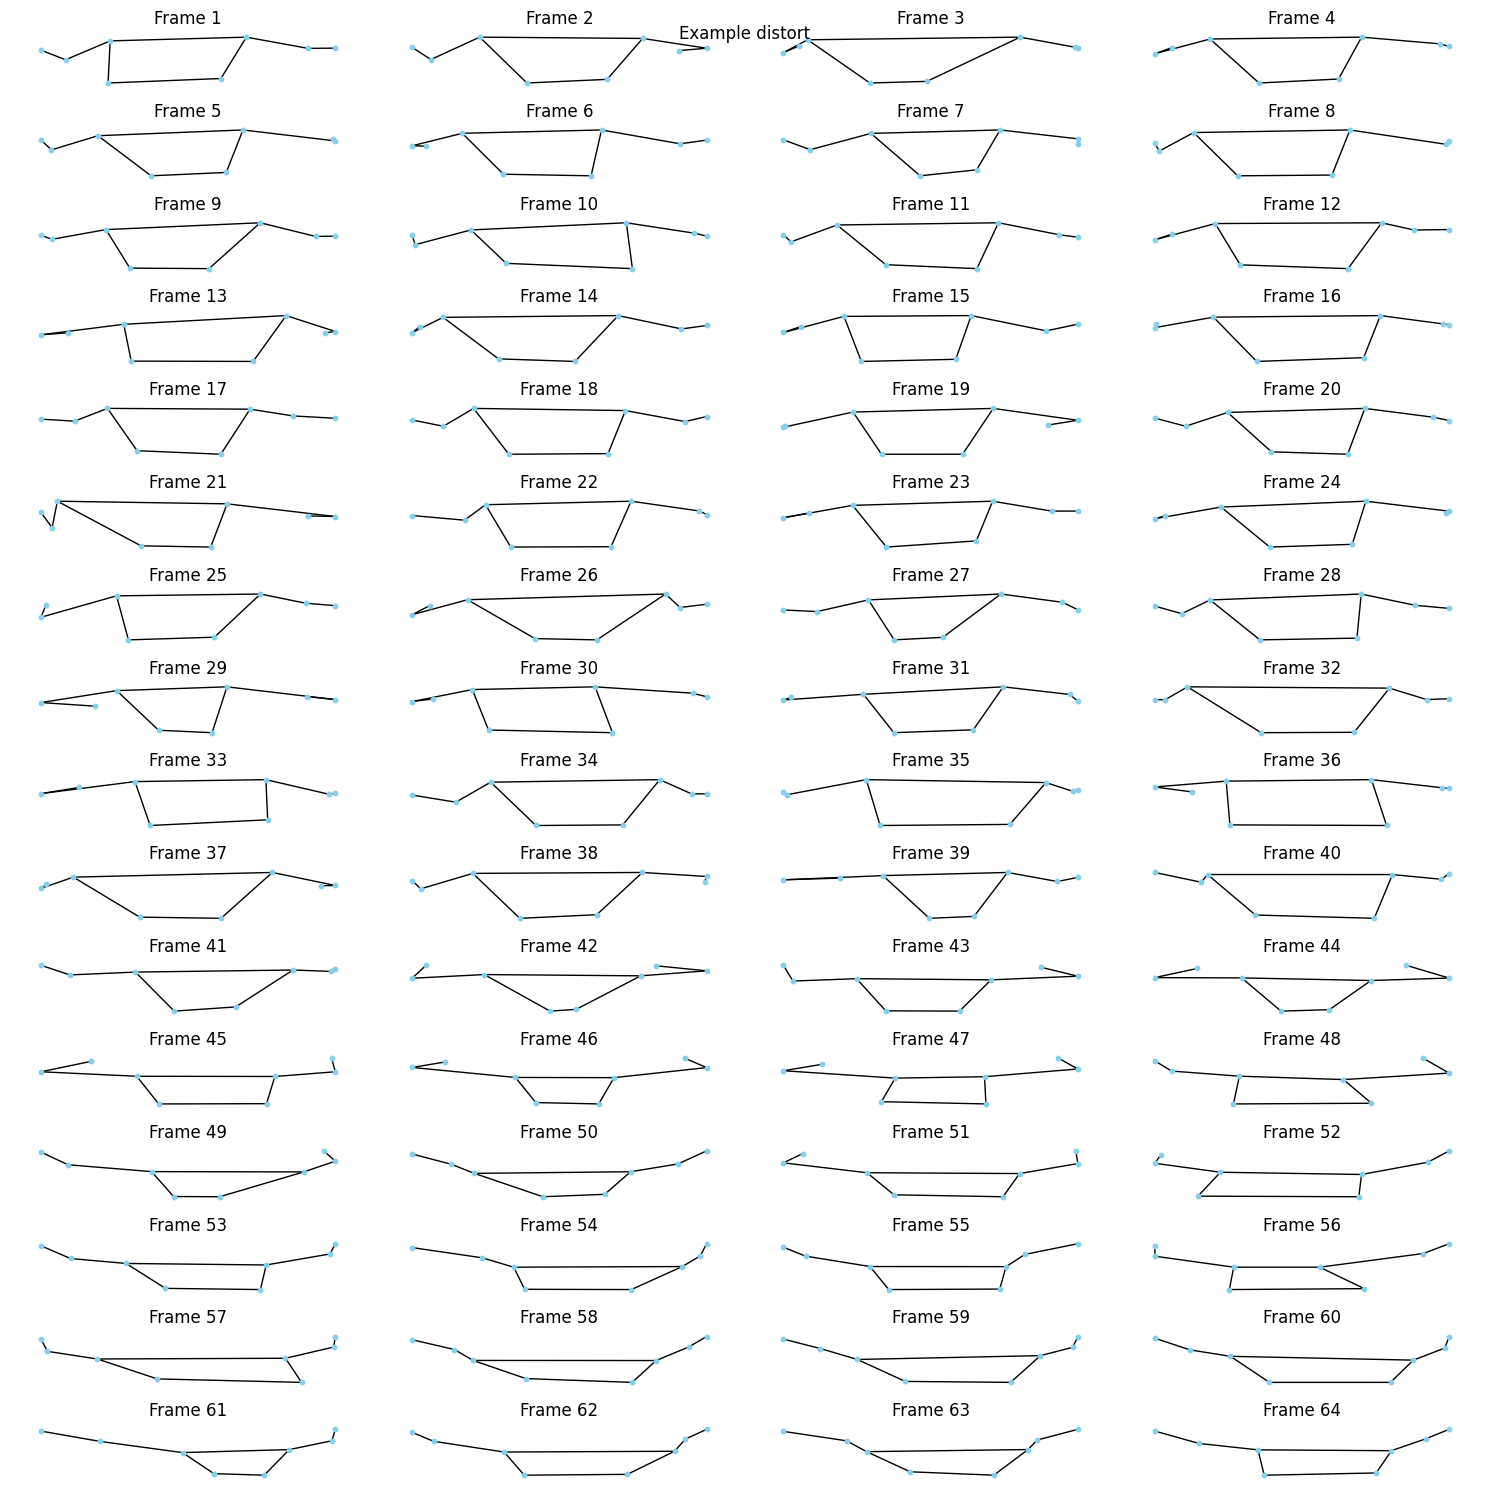

In [6]:
distort_seq = pose_augmenter.distort_sequence(example)
plot_sequence(distort_seq, f"Example distort")